<a href="https://colab.research.google.com/github/Vaycold/Python_ML/blob/main/Reco_Algo/%232.Movielens%20with%20MF%20using%20SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 전처리

In [3]:
import pandas as pd

rating_url = 'https://raw.githubusercontent.com/yoonkt200/python-data-analysis/master/data/ml-1m/ratings.dat'
rating_df  = pd.io.parsers.read_csv(rating_url, names = ['user_id', 'movie_id', 'rating','time'], delimiter = '::',engine='python')
rating_df.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
movie_url = 'https://raw.githubusercontent.com/yoonkt200/python-data-analysis/master/data/ml-1m/movies.dat'
movie_df  =  pd.io.parsers.read_csv(rating_url, names = [ 'movie_id', 'title','genre'], delimiter = '::',engine='python', encoding='ISO-8859-1')
movie_df.head()

,movie_id,title,genre
1,1193,5,978300760
1,661,3,978302109
1,914,3,978301968
1,3408,4,978300275
1,2355,5,978824291


In [ ]:
print(f'movie_df : {movie_df.shape}')
print(f'rating_df : {rating_df.shape}')

movie_df : (1000209, 3)
rating_df : (1000209, 4)


In [ ]:
# 사용자 수 및 영화 갯수

print(f'유저 아이디 수 : {len(rating_df["user_id"].unique())}')
print(f'영화의 개수  : {len(rating_df["movie_id"].unique())}')


유저 아이디 수 : 6040
영화의 개수  : 3706


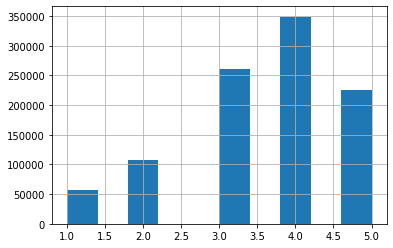

In [ ]:
# 영화 점수 분포 탐색
import matplotlib.pyplot as plt
rating_df['rating'].hist()

## MF-Based Modeling (SVD)

In [ ]:
# Modeling
!pip install surprise

from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

reader = Reader(rating_scale = (1,5))  # rating은 1점부터 5점까지다.
data = Dataset.load_from_df(rating_df[['user_id','movie_id','rating']] ,reader)
trainset, testset  = train_test_split(data, test_size = 0.25)

In [6]:
# SVD
from surprise import SVD
from surprise.accuracy import rmse
algo = SVD()
algo.fit(trainset)
predictions = algo.test(testset)

In [7]:
rmse(predictions)

RMSE: 0.8774


0.8774346240449056

In [10]:
# latent factor를 얼마만큼 만들어 내느냐가 SVD의 parameter가 됨.
from time import time

param_list = [10, 50, 100, 150, 200]
rmse_list_by_factors = []
ttime_list_by_factors = []
for n in param_list :
    train_start = time()
    algo = SVD(n_factors= n )
    algo.fit(trainset)
    train_end = time()

    print('training of time of model : %.2f seconds' % (train_end-train_start))
    print('RMSE of test dataset in SVD Model, n_factors = '+str(n))
    predictions = algo.test(testset)
    rmse_result = rmse(predictions)
    rmse_list_by_factors.append(rmse_result)
    ttime_list_by_factors.append(train_end - train_start)
    print('--------------------------------------------------')
print('Done!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')

training of time of model : 17.14 seconds
RMSE of test dataset in SVD Model, n_factors = 10
RMSE: 0.8775
--------------------------------------------------
training of time of model : 30.49 seconds
RMSE of test dataset in SVD Model, n_factors = 50
RMSE: 0.8748
--------------------------------------------------
training of time of model : 46.46 seconds
RMSE of test dataset in SVD Model, n_factors = 100
RMSE: 0.8778
--------------------------------------------------
training of time of model : 61.75 seconds
RMSE of test dataset in SVD Model, n_factors = 150
RMSE: 0.8800
--------------------------------------------------
training of time of model : 78.42 seconds
RMSE of test dataset in SVD Model, n_factors = 200
RMSE: 0.8823
--------------------------------------------------
Done!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


In [11]:
rmse_list_by_factors

[0.8775301330032051,
 0.8748169607289128,
 0.8778036864228941,
 0.8800066229912309,
 0.8822818795848832]

In [12]:
ttime_list_by_factors

[17.141536474227905,
 30.49177837371826,
 46.458786487579346,
 61.747758626937866,
 78.41775751113892]

In [23]:
import numpy as np
param_list[np.array(rmse_list_by_factors).argmin()]

50

In [26]:
# Final evaluation
algo = SVD(n_factors  = 50)
algo.fit(trainset)
predictions = algo.test(testset)
rmse(predictions)

RMSE: 0.8739


0.8739165862998768